In [3]:
from Gan_Simulator import *
import param_gan as param
import yfinance as yf

Firstly, we import some finance data from yfinance, I use a proxy and you should change this pertaining to your internet setting.

In [4]:
msft = yf.Ticker("MSFT")
proxies = {'https': 'http://127.0.0.1:10809'}
hist = msft.history(period="30y",timeout=1,proxy=proxies)
train_data = extract_train_data(hist.Close.values)

Epoch [1/1000], d_loss: 9.692119, g_loss: -0.110415 
Epoch [2/1000], d_loss: 9.703769, g_loss: -0.138666 
Epoch [3/1000], d_loss: 9.637244, g_loss: -0.129472 
Epoch [4/1000], d_loss: 9.549319, g_loss: -0.140277 
Epoch [5/1000], d_loss: 9.521539, g_loss: -0.137011 
Epoch [6/1000], d_loss: 9.359216, g_loss: -0.146645 
Epoch [7/1000], d_loss: 9.285014, g_loss: -0.158552 
Epoch [8/1000], d_loss: 9.036356, g_loss: -0.157065 
Epoch [9/1000], d_loss: 8.910165, g_loss: -0.147151 
Epoch [10/1000], d_loss: 8.819304, g_loss: -0.149539 
Epoch [11/1000], d_loss: 8.546092, g_loss: -0.211439 
Epoch [12/1000], d_loss: 8.179638, g_loss: -0.194873 
Epoch [13/1000], d_loss: 8.004873, g_loss: -0.177761 
Epoch [14/1000], d_loss: 7.723795, g_loss: -0.193385 
Epoch [15/1000], d_loss: 7.420807, g_loss: -0.234734 
Epoch [16/1000], d_loss: 7.094977, g_loss: -0.250327 
Epoch [17/1000], d_loss: 6.302900, g_loss: -0.241128 
Epoch [18/1000], d_loss: 6.000402, g_loss: -0.156054 
Epoch [19/1000], d_loss: 5.145478, g_

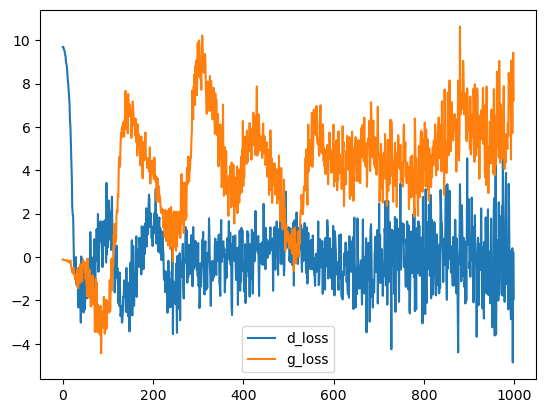

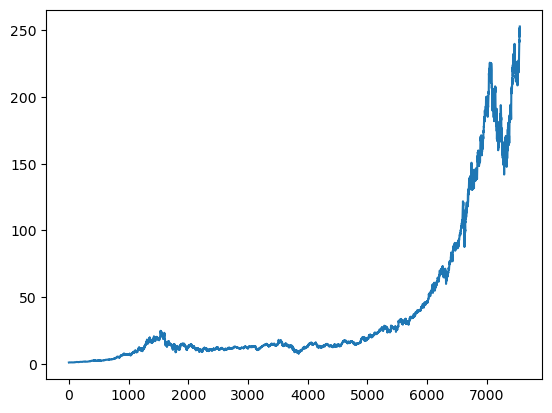

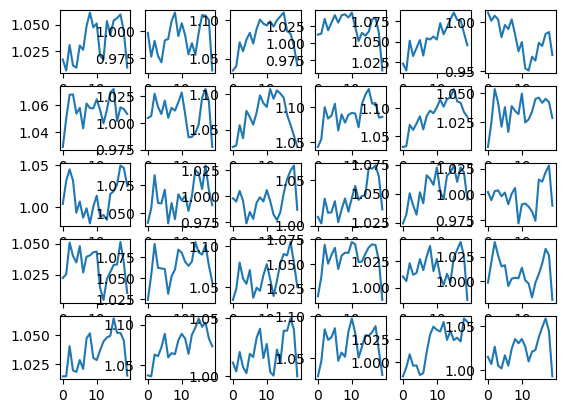

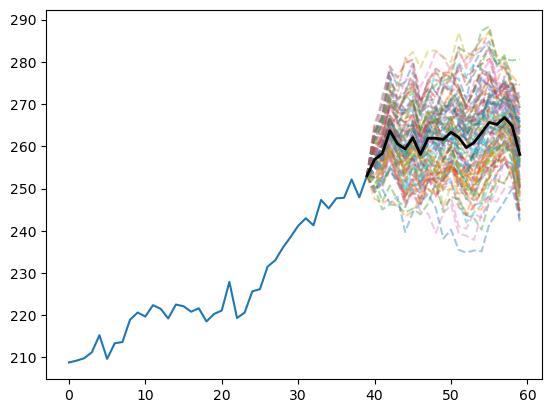

In [5]:
if param.gan_type=='gan':
    import core_cwgan_gp_v3
    # 构建并训练GAN
    G, res_train = core_cwgan_gp_v3.train_gan(param,train_data,mute=False,plot=True)
    fake_data_gan = core_cwgan_gp_v3.simu_gan(param,G,train_data=train_data,plot=True)

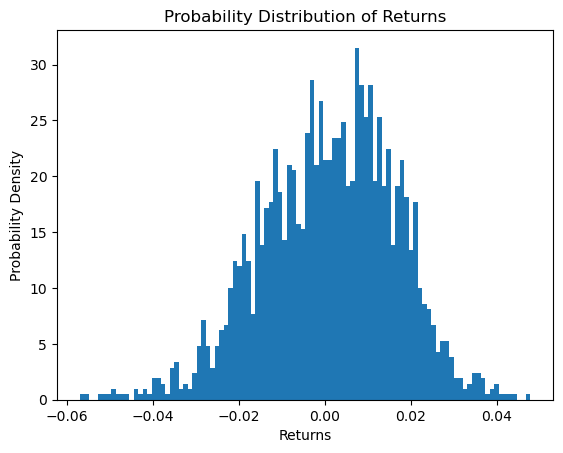

In [6]:
returns=fake_data_gan.reshape(-1)
plt.hist(returns, bins=100, density=True)
plt.title('Probability Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Probability Density')
# 显示图形
plt.show()

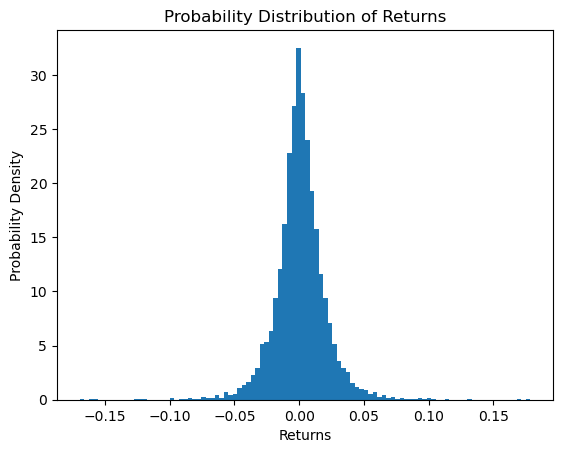

In [7]:
returns=train_data.reshape(-1)
plt.hist(returns, bins=100, density=True)
plt.title('Probability Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Probability Density')
# 显示图形
plt.show()

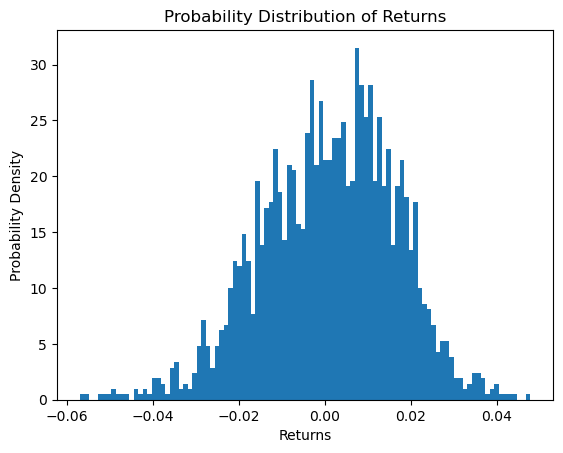

In [8]:
returns=fake_data_gan.reshape(-1)
plt.hist(returns, bins=100, density=True)
plt.title('Probability Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Probability Density')
# 显示图形
plt.show()

In [9]:
from scipy.stats import kurtosis, skew
skewness = skew(train_data.reshape(-1))
print("偏度：", skewness)
kurt = kurtosis(train_data.reshape(-1))
print("峰度：", kurt)
skewness = skew(fake_data_gan.reshape(-1))
print("偏度：", skewness)
kurt = kurtosis(fake_data_gan.reshape(-1))
print("峰度：", kurt)


偏度： -0.07577064813391504
峰度： 7.030292605905339
偏度： -0.2990831279089748
峰度： 0.0748857303522179
